# Classification Methods - Statistical Learning

In this notebook I'll show some classification methods such as logistic regression, Naive Bayes and KNN (K- nearest Neighbors).

In [47]:
import numpy as np
import pandas as pd
from plotnine import *
import random
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

## Data set

In [2]:
digitos = pd.DataFrame(pd.read_table('~\\OneDrive\\Documentos\\stat_learning\\Aula_5_Classificacao\\Dados\\train_data.txt', header=None, delim_whitespace=True)).rename(columns={0: 'digito', 1: 'intensidade', 2: 'simetria'})
digitos.head()

,digito,intensidade,simetria
0,6.0,0.341092,-4.528937
1,5.0,0.444131,-5.496812
2,4.0,0.231002,-2.886750
3,7.0,0.200275,-3.534375
4,3.0,0.291936,-4.352062


- digito: represents the number
- intensidade: represent the intensity of a given pixel
- simetria: represents the symmetry of a given pixel

In [3]:
digitos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7291 entries, 0 to 7290
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   digito       7291 non-null   float64
 1   intensidade  7291 non-null   float64
 2   simetria     7291 non-null   float64
dtypes: float64(3)
memory usage: 171.0 KB


For this classification problem, we have to consider de ***digito*** column as a category.

In [4]:
digitos['digito'] = pd.Categorical(digitos.digito)

digitos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7291 entries, 0 to 7290
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   digito       7291 non-null   category
 1   intensidade  7291 non-null   float64 
 2   simetria     7291 non-null   float64 
dtypes: category(1), float64(2)
memory usage: 121.5 KB


In [5]:
pd.DataFrame(digitos.groupby('digito')['digito'].count())

,digito
digito,
0.0,1194
1.0,1005
2.0,731
3.0,658
4.0,652
5.0,556
6.0,664
7.0,645
8.0,542


### Pre Analysis

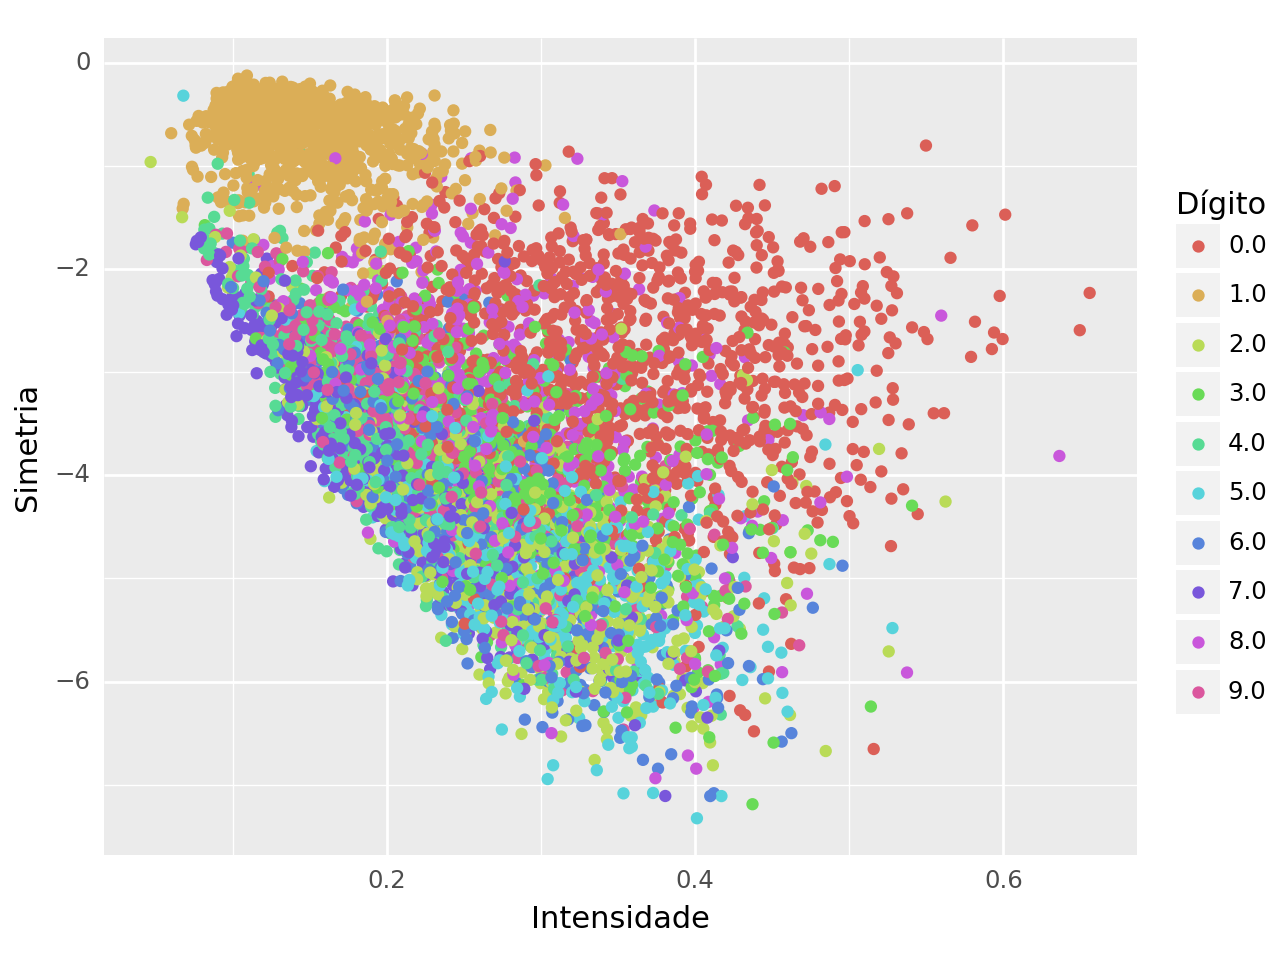

<Figure Size: (640 x 480)>

In [6]:
(
    ggplot(data = digitos)+
        geom_point(aes(x = "intensidade", y = "simetria", colour = "digito"))+
        labs(x = "Intensidade", y = "Simetria", colour = "Dígito")+
        theme(axis_ticks= element_blank())
)

In te scatter plot above we can see that the most different digit is the number 1, having quite little **instensidade** and some high **simetria**, so we can distinguish very weel. On the hand, for the others numbers it is pretty difficul to identify. 

Therefore, lets analyse only the numbers, 1 and 0, because if we join all the others digits, except 1, into a new category, the data set will be unbalaced. Thus, I'll create a variable calles **flag1**, indicating if the digit is 1 or 0.

In [7]:
digito_2 = digitos.loc[lambda digitos: (digitos['digito'] == 1) | (digitos['digito'] == 0)]
digito_2['flag1'] = pd.Categorical(digito_2.loc[lambda digito_2: (digito_2['digito'] == 1) | (digito_2['digito'] == 0)].digito.transform(lambda x: 1 if x == 1 else 0))
digito_2

C:\Users\kioia\AppData\Local\Temp\ipykernel_16204\2456518958.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,digito,intensidade,simetria,flag1
7,1.0,0.123043,-0.707875,1
8,0.0,0.289541,-4.644125,0
9,1.0,0.113859,-0.931375,1
11,0.0,0.331508,-1.940187,0
12,1.0,0.115371,-0.386000,1
...,...,...,...,...
7279,0.0,0.310381,-3.668312,0
7284,1.0,0.195104,-1.217937,1
7285,1.0,0.168846,-0.582250,1
7289,0.0,0.597590,-2.258062,0


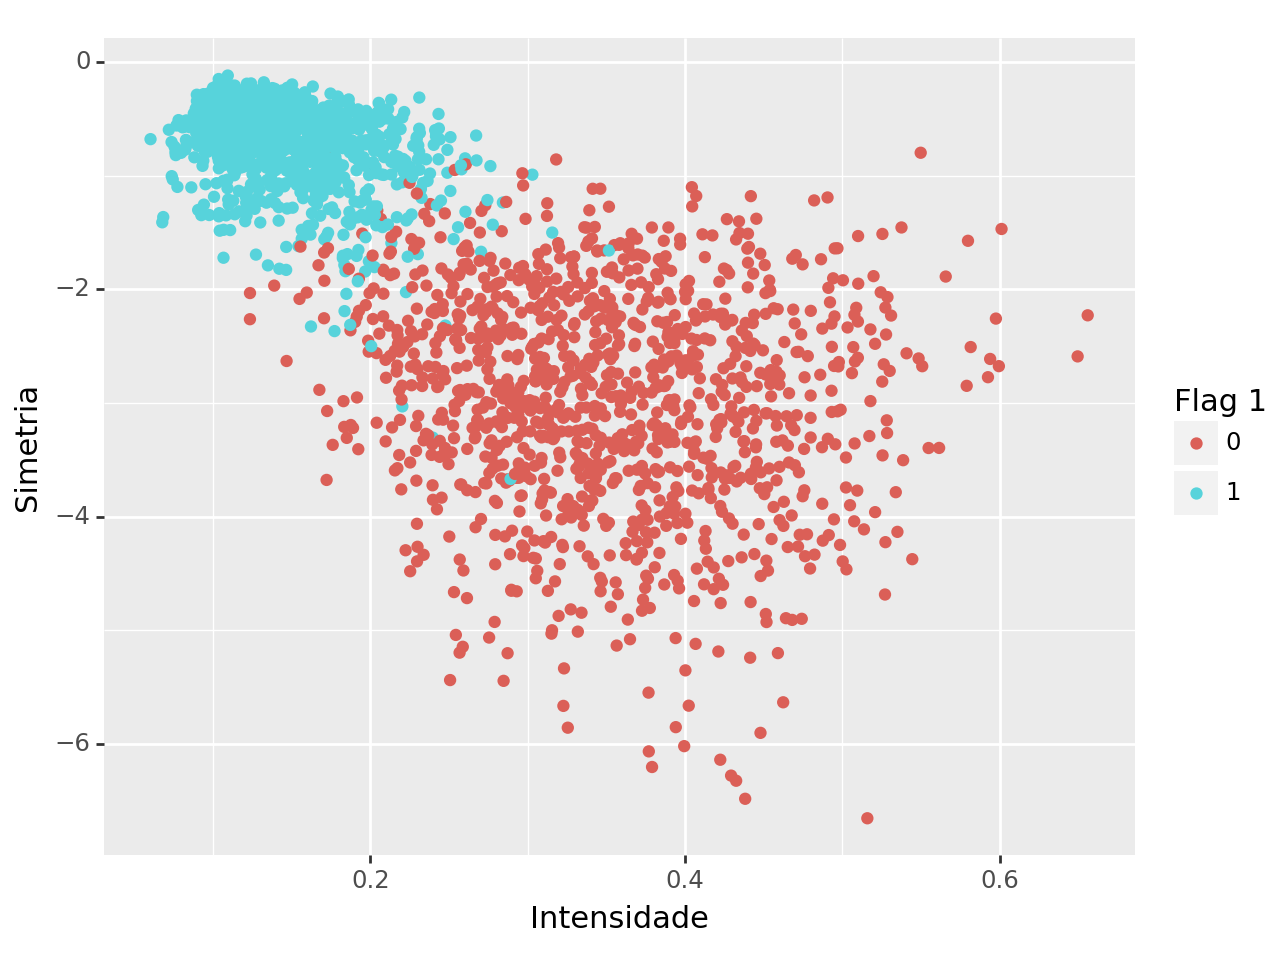

<Figure Size: (640 x 480)>

In [8]:
(
    ggplot(data = digito_2)+
        geom_point(aes(x = 'intensidade', y = 'simetria', colour = 'flag1'))+
        labs(x = 'Intensidade', y = 'Simetria', colour = 'Flag 1')
)

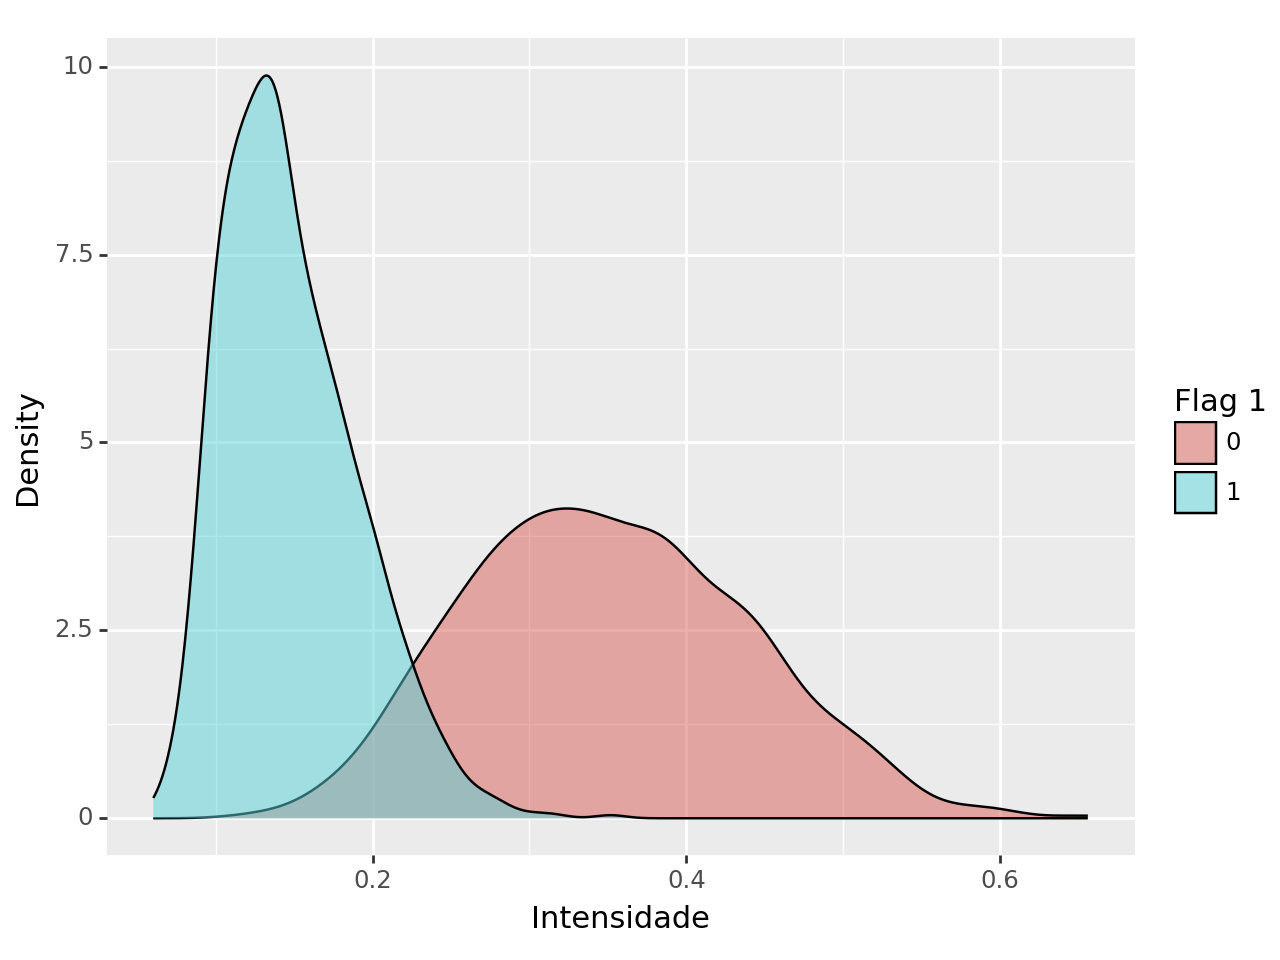

<Figure Size: (640 x 480)>

In [9]:
(
    ggplot(data = digito_2)+
        geom_density(aes(x = 'intensidade', fill = 'flag1'), alpha = 0.5)+
        labs(x = 'Intensidade', y = 'Density', fill = 'Flag 1')
)

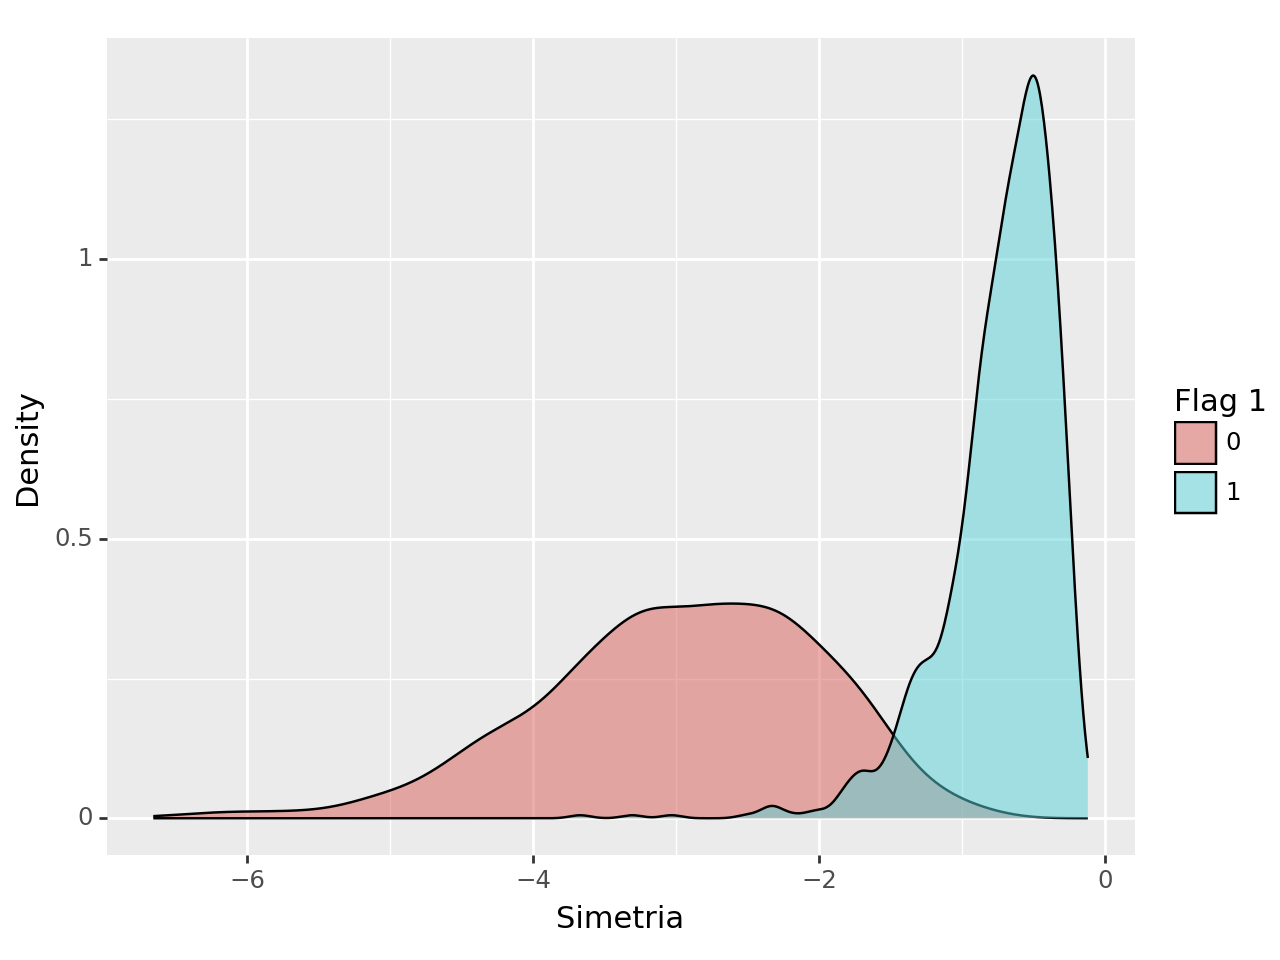

<Figure Size: (640 x 480)>

In [10]:
(
    ggplot(data = digito_2)+
        geom_density(aes(x = 'simetria', fill = 'flag1'), alpha = 0.5)+
        labs(x = 'Simetria', y = 'Density', fill = 'Flag 1')
)

By the density plots above, we can observe that for the digits 1 and 0, the median are pretty differente, indicating that those variables are strong classifiers.

#### Creating the train and test data sets

In [11]:
feature = digito_2[['intensidade', 'simetria']]
target = digito_2['flag1']
feature_train, feature_test, target_train, target_test  = train_test_split(feature, target, test_size=0.2, random_state=123)

## Logistic Regression

In [12]:
log_model = LogisticRegression().fit(X = feature_train, y = target_train)

Calculating the accuracy inside the sample train:

In [13]:
prob_fitted_log = pd.DataFrame(log_model.predict_proba(X = feature_train))
prob_fitted_log['fitted_target'] = prob_fitted_log[1].transform(lambda x: 1 if x > 0.5 else 0)
pd.DataFrame(metrics.confusion_matrix(target_train, pd.array(prob_fitted_log['fitted_target'])))

,0,1
0,928,28
1,23,780


By modelling Logistic Regression, we had, in the training data set:

- 928 True *0* predictions
- 780 True *1* predictions
- 23 False *1* predictions
- 28 False *0* predictions

The train accuracy is given by: 

$$
\frac{1}{N} \sum_{i=1}^{N}I(y_{i} = \hat{y}_{i}) = \frac{TP+TN}{N}
$$

Where TP: True Positive, TF: True Negative and N = Total number of obervation, in the training data set.

In [107]:
log_accuracy_train = metrics.accuracy_score(target_train, pd.array(prob_fitted_log['fitted_target']))
print("Logistic Regression Training Accuracy: {0:.2%}".format(log_accuracy_train))

Logistic Regression Training Accuracy: 97.10%


In [15]:
log_predict = log_model.predict(feature_test)
pd.DataFrame(metrics.confusion_matrix(target_test, log_predict)) # target test vai nas colunas e target predict nas linhas
# linha sendo a classe real da observação e coluna sendo o predito

,0,1
0,231,7
1,11,191


The test accuracy is given by: 

$$
\frac{TP+TN}{N}
$$

Where TP: True Positive, TF: True Negative and N = Total number of obervation in the test data set.

In [103]:
log_accuracy_test = metrics.accuracy_score(target_test, log_predict)
print("Logistic Regression Test Accuracy: {0:.2%}".format(log_accuracy_test))

Logistic Regression Test Accuracy: 95.91%


Now lets calculate the precision and recall, which are the proprtion of correct positive classification and proportion of true possitive correct classification, respectively.

$$
Precision = \frac{TP}{TP+FP} \quad \quad Recall = \frac{TP}{TP+FN}
$$

In [104]:
log_precision = metrics.precision_score(target_test, log_predict)
log_recall = metrics.recall_score(target_test, log_predict)
print("Precision: {0:.2%} \n Recall: {1:.2%}".format(log_precision, log_recall))

Precision: 96.46% 
 Recall: 94.55%


Therefore, 94.46% of the positive classification predicted is positive and 94.55% of the true positive was accuratly classified.

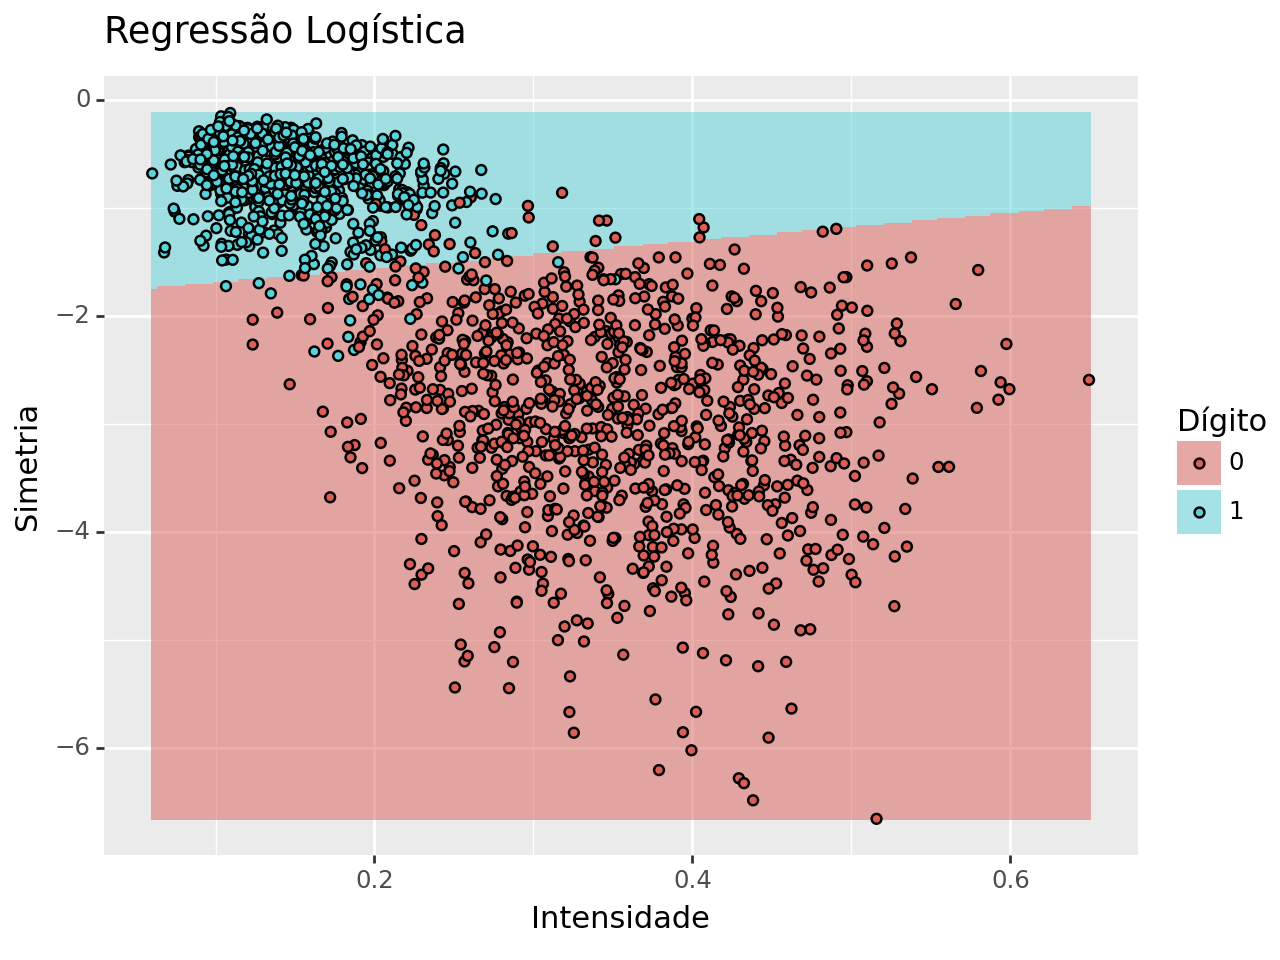

<Figure Size: (640 x 480)>

In [18]:
df = {'intensidade': np.linspace(start=min(feature_train['intensidade']), stop=max(feature_train['intensidade']), num=300), 'simetria': np.linspace(start=min(feature_train['simetria']), stop=max(feature_train['simetria']), num=300)}
grid = pd.MultiIndex.from_product(df.values(), names=df.keys()).to_frame().reset_index(drop=True)
grid['flag1'] = pd.Categorical(log_model.predict(X = grid))

(
    ggplot()+
        geom_tile(aes(x = 'intensidade', y = 'simetria', fill = 'flag1'),  data = grid, alpha = 0.5)+
        geom_point(aes(x = 'intensidade', y = 'simetria', fill = 'flag1'), data = pd.concat([feature_train, target_train], axis=1))+
        labs(x = 'Intensidade', y = 'Simetria', fill = 'Dígito', title = 'Regressão Logística')
)

In [144]:
model_comparison = [['Logistic Regression', log_accuracy_train, log_accuracy_test, log_precision, log_recall]]

## Naives Bayes

In [105]:
gnb = GaussianNB()
gnb_model = gnb.fit(X = feature_train, y = target_train)
gnb_prob_fitted = gnb_model.predict_proba(X = feature_train)

Calculating error in the training data set:

In [137]:
gnb_prob_fitted = pd.DataFrame(gnb_model.predict_proba(X = feature_train))
gnb_prob_fitted['flag1'] = gnb_prob_fitted[1].transform(lambda x: 1 if x > 0.5 else 0)
pd.DataFrame(metrics.confusion_matrix(target_train, gnb_prob_fitted['flag1']))

,0,1
0,940,16
1,23,780


In [138]:
gnb_accuracy_train = metrics.accuracy_score(target_train, gnb_prob_fitted['flag1'])
print("Gaussian Naive Bayes Train Accuracy: {0:.2%}".format(gnb_accuracy_train))

Gaussian Naive Bayes Train Accuracy: 97.78%


Calculating test error:

In [146]:
gnb_predict = gnb_model.predict(X = feature_test)
pd.DataFrame(metrics.confusion_matrix(target_test, gnb_predict))

,0,1
0,236,2
1,8,194


In [147]:
gnb_accuracy_test = metrics.accuracy_score(target_test, gnb_predict)
print("Gaussian Naive Bayes Test Accuracy: {0:.2%}".format(gnb_accuracy_test))

Gaussian Naive Bayes Test Accuracy: 97.73%


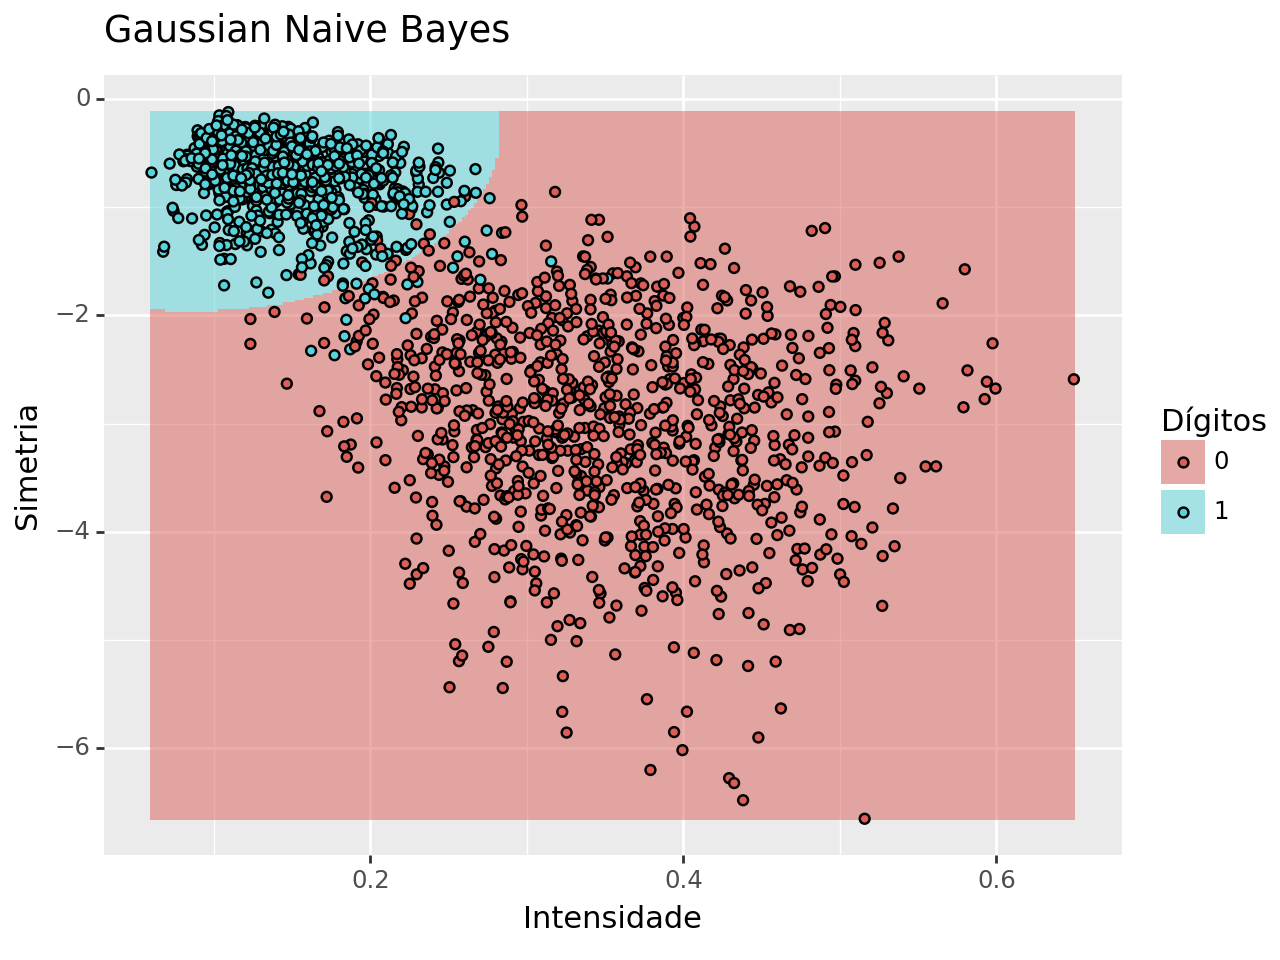

<Figure Size: (640 x 480)>

In [91]:
grid_gnb = pd.DataFrame()
grid_gnb['intensidade'], grid_gnb['simetria'] = grid['intensidade'], grid['simetria']
grid_gnb['flag1'] = pd.Categorical(gnb_model.predict(grid_gnb))

(
    ggplot()+
        geom_tile(aes(x = 'intensidade', y = 'simetria', fill = 'flag1'), data = grid_gnb, alpha = 0.5)+
        geom_point(aes(x = 'intensidade', y = 'simetria', fill = 'flag1'), data = pd.concat([feature_train, target_train], axis=1))+
        labs(x = 'Intensidade', y = 'Simetria', fill = 'Dígitos', title = 'Gaussian Naive Bayes')
)

In [148]:
gnb_precision = metrics.precision_score(target_test, gnb_predict)
gnb_recall = metrics.recall_score(target_test, gnb_predict)
print("Gaussian Naive Bayes Precision: {0:.2%} \n Gaussain Naive Bayes Recall: {1:.2%}".format(gnb_precision, gnb_recall))

Gaussian Naive Bayes Precision: 98.98% 
 Gaussain Naive Bayes Recall: 96.04%


In [145]:
model_comparison.append(['Gaussian Naive Bayes', gnb_accuracy_train, gnb_accuracy_test, gnb_precision, gnb_recall])

## KNN (K Nearest Neighbors)

In this section, I'll just use K = 3, but it is possible to use a looping to search the optimal K for the data.

For the KNN method, we need to normalize the datas for calculate the distance between the observation. 

In [32]:
knn_feature_train = pd.DataFrame((feature_train['intensidade']-min(feature_train['intensidade']))/(max(feature_train['intensidade'])-min(feature_train['intensidade'])))
knn_feature_train['simetria'] = (feature_train['simetria']-min(feature_train['simetria']))/(max(feature_train['simetria'])-min(feature_train['simetria']))
knn_feature_test = pd.DataFrame((feature_test['intensidade']-min(feature_train['intensidade']))/(max(feature_train['intensidade'])-min(feature_train['intensidade'])))
knn_feature_test['simetria'] = (feature_test['simetria']-min(feature_train['simetria']))/(max(feature_train['simetria'])-min(feature_train['simetria']))

In [33]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X = knn_feature_train, y = target_train)
knn_prob_fitted = pd.DataFrame(knn_model.predict_proba(knn_feature_train))
knn_prob_fitted['Class_fitted'] = knn_prob_fitted[1].transform(lambda x: 1 if x > 0.5 else 0)
pd.DataFrame(metrics.confusion_matrix(target_train, knn_prob_fitted['Class_fitted']))

,0,1
0,941,15
1,12,791


In [151]:
knn_accuracy_train = metrics.accuracy_score(target_train, knn_prob_fitted['Class_fitted'])
print("KNN Method Train Accuracy: {0:.2%}".format(metrics.accuracy_score(target_train, knn_prob_fitted['Class_fitted'])))

KNN Method Train Accuracy: 98.47%


Comparing the Logistic Regression with KNN Method, we had a slitgh increase in the accuracy inside the train data set. Now lets see if the same situation happens in the test data set.

In [35]:
knn_predict = knn_model.predict(X = knn_feature_test)
pd.DataFrame(metrics.confusion_matrix(target_test, knn_predict))

,0,1
0,234,4
1,12,190


In [156]:
knn_accuracy_test = metrics.accuracy_score(target_test, knn_predict)
print("KNN Method Test Accuracy: {0:.2%}".format(knn_accuracy_test))

KNN Method Test Accuracy: 96.36%


And the same happened in the test data set, we obtained same accuracy using the KNN method for classification.

In [154]:
knn_precision = metrics.precision_score(target_test, knn_predict)
knn_recall = metrics.recall_score(target_test, knn_predict)
print("Precision: {0:.2%} \n Recall: {1:.2%}".format(knn_precision, knn_recall))

Precision: 97.94% 
 Recall: 94.06%


Even for the precision and the recall, we had a slight increase using KNN method, with 3 nearest neighbors.

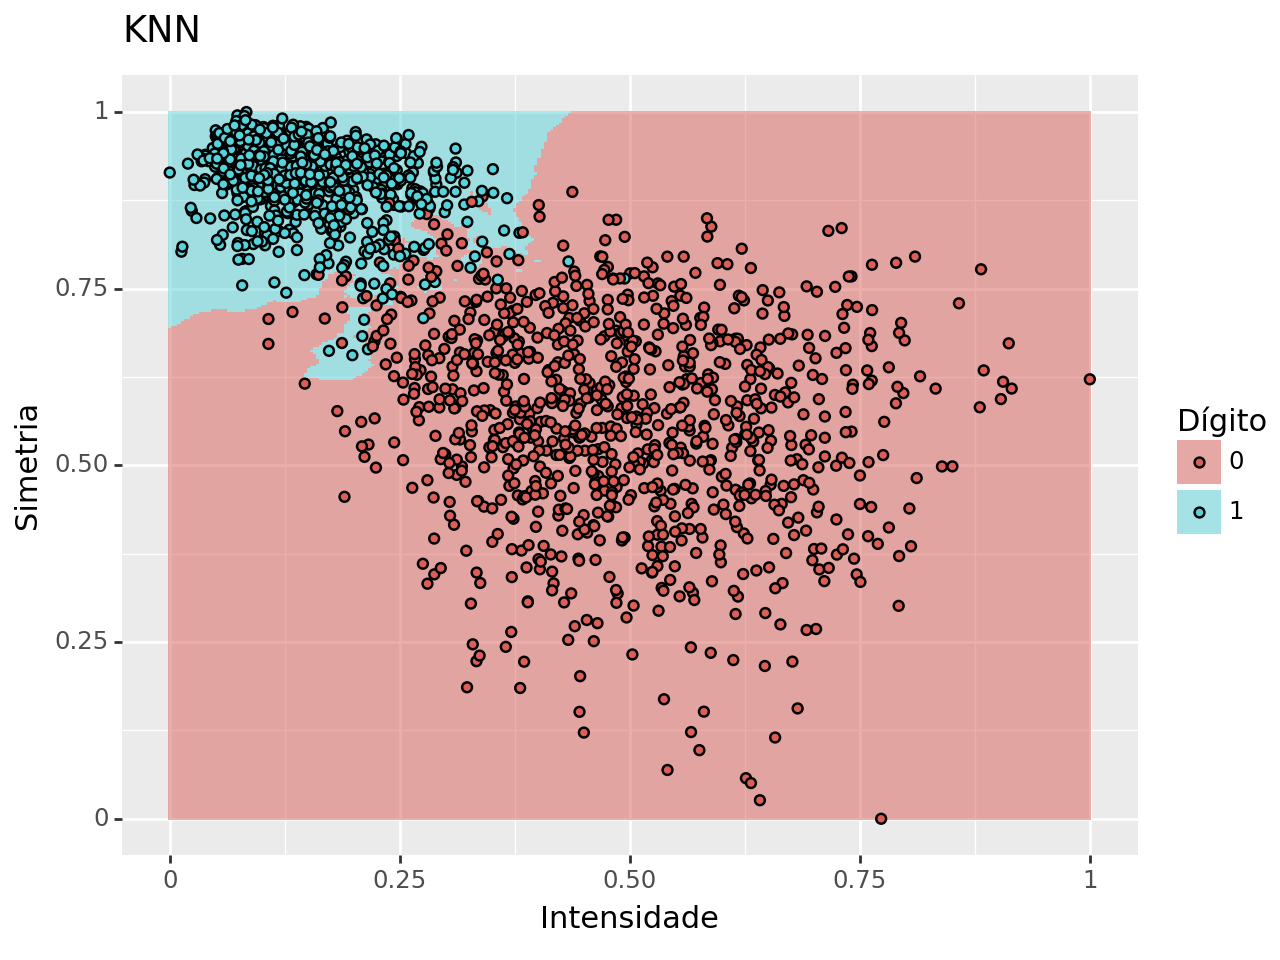

<Figure Size: (640 x 480)>

In [46]:
grid_knn = pd.DataFrame((grid['intensidade']-min(feature_train['intensidade']))/(max(feature_train['intensidade'])-min(feature_train['intensidade'])))
grid_knn['simetria'] = (grid['simetria']-min(feature_train['simetria']))/(max(feature_train['simetria'])-min(feature_train['simetria']))
grid_knn['flag1'] = pd.Categorical(knn_model.predict(X = grid_knn))

(
    ggplot()+
        geom_tile(aes(x = 'intensidade', y = 'simetria', fill = 'flag1'), data = grid_knn, alpha = 0.5)+
        geom_point(aes(x = 'intensidade', y = 'simetria', fill = 'flag1'), data = pd.concat([knn_feature_train, target_train], axis=1))+
        labs(x = 'Intensidade', y = 'Simetria', fill = 'Dígito', title = 'KNN')
)

In [157]:
model_comparison.append(['KNN', knn_accuracy_train, knn_accuracy_test, knn_precision, knn_recall])

## Model Comparison

In [162]:
pd.DataFrame(model_comparison).rename(columns={0: 'Model', 1: 'Train Accuracy', 2: 'Test Accuracy', 3: 'Precision', 4: 'Recall'})

,Model,Train Accuracy,Test Accuracy,Precision,Recall
0,Logistic Regression,0.971006,0.959091,0.964646,0.945545
1,Gaussian Naive Bayes,0.977828,0.977273,0.989796,0.960396
2,KNN,0.984650,0.963636,0.979381,0.940594
